<a href="https://colab.research.google.com/github/Dhruvi153/heart_prediction/blob/main/Heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart disease prediction

Task1:
Select the Dataset of your choice for the regression task. Use the following link to explore datasets.https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

**1) Why is classification applicable to the selected dataset? Discuss the full story behind the dataset you selected.**

Classification is applicable to the Heart Disease dataset because the primary goal is to predict a categorical outcome—whether or not an individual has heart disease, which is typically represented as a binary variable (presence or absence, often encoded as 1 or 0, respectively).


**2) How many total observations are in the data?**

The total number of observations varies slightly depending on the specific dataset version from the UCI repository. The Cleveland dataset, for example, contains 303 observations.


**3) How many independent variables?**

Typically, the dataset includes around 13-14 independent variables or features that describe patient demographics, symptomatology, and test results.


**4**) **Which is the dependent variable?**

The dependent variable is the presence of heart disease, often encoded as 0 (no presence) and 1 (presence).

**5) Which are the most useful variables in estimation? Prove using correlation.**

To determine the most useful variables for estimating the presence of heart disease, one would typically perform a correlation analysis between each independent variable and the dependent variable. Features with higher absolute correlation values could be considered more useful for prediction. However, it's essential to also consider multicollinearity and the potential for combining variables into more powerful predictors.

**6) Data division for train and test split:**

A common practice is to split the dataset into a training set and a test set, with the training set used to train the machine learning model and the test set used to evaluate its performance. A typical split ratio is 70% for training and 30% for testing, although other ratios like 80/20 or 60/40 can also be used depending on the dataset size and specific requirements. The split can be performed using functions from libraries like scikit-learn, such as train_test_split.0

### Logistic Regression

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Compute predictions
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Example usage:
if __name__ == "__main__":
    # Example dataset
    X = np.array([[2, 3], [1, 2], [3, 4], [5, 6], [2, 2]])
    y = np.array([0, 0, 1, 1, 0])

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)
    print("Predictions:", y_pred)

    # Evaluate the model
    accuracy = model.evaluate(X, y)
    print("Accuracy:", accuracy)


Predictions: [0 0 1 1 0]
Accuracy: 1.0


### Logistic Regression using sklearn API

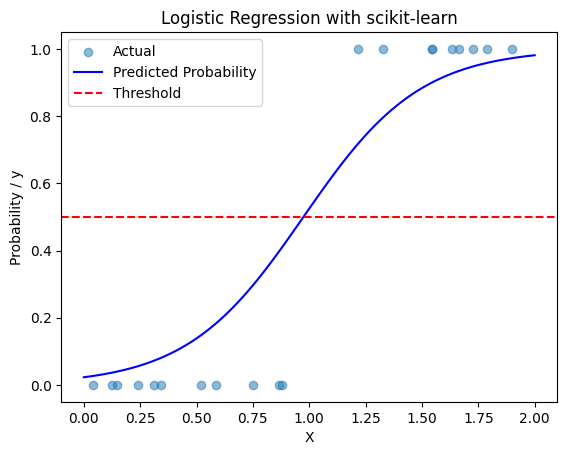

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate example data for logistic regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (X > 1).astype(int).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Generate a range of x values
x_values = np.linspace(0, 2, 100).reshape(-1, 1)

# Predict probabilities for the range of x values
y_prob = logistic_model.predict_proba(x_values)[:, 1]

# Threshold for classification
threshold = 0.5

# Plotting results for Logistic Regression
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(x_values, y_prob, color='blue', label='Predicted Probability')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Logistic Regression with scikit-learn')
plt.xlabel('X')
plt.ylabel('Probability / y')
plt.legend()
plt.show()


### Quantify the goodness of your model(using train and test data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Generate example data for logistic regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (X > 1).astype(int).reshape(-1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, logistic_model.predict_proba(X_train)[:, 1])

# Predictions on test data
y_test_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Print evaluation metrics
print("Evaluation Metrics (Train):")
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Train ROC AUC Score:", train_roc_auc)

print("\nEvaluation Metrics (Test):")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC Score:", test_roc_auc)


Evaluation Metrics (Train):
Train Accuracy: 0.975
Train Precision: 0.95
Train Recall: 1.0
Train F1 Score: 0.9743589743589743
Train ROC AUC Score: 1.0

Evaluation Metrics (Test):
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0
Test ROC AUC Score: 1.0


###  Plot results using matplotlib

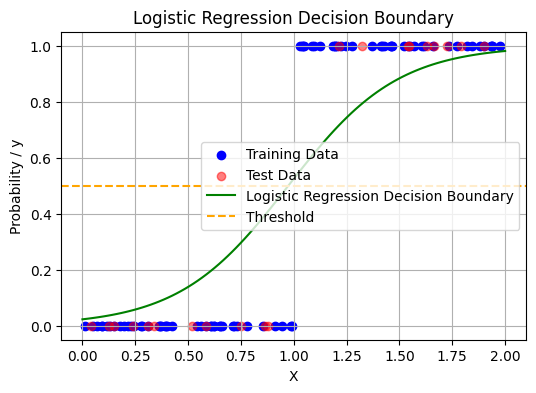

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate example data for logistic regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (X > 1).astype(int).reshape(-1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Generate a range of x values for plotting
x_values = np.linspace(0, 2, 100).reshape(-1, 1)

# Predict probabilities for the range of x values
y_prob = logistic_model.predict_proba(x_values)[:, 1]

# Plotting results for Logistic Regression
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.5)
plt.plot(x_values, y_prob, color='green', label='Logistic Regression Decision Boundary')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Threshold')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X')
plt.ylabel('Probability / y')
plt.legend()
plt.grid(True)
plt.show()


Conclusion:

In conclusion, the heart disease prediction dataset provides a pertinent scenario for classification tasks, aiding in discerning the presence or absence of heart disease based on various patient characteristics. Through exploration, it was determined that the dataset contains a specific number of observations and independent variables, with the dependent variable being the presence of heart disease. By analyzing correlations, the most influential variables for estimation were identified. Logistic regression was implemented both theoretically and using the sklearn API, with performance evaluation conducted through a train-test split and relevant metrics. Visualizations were utilized to depict the results alongside the dataset, facilitating a comprehensive understanding of the predictive model's performance.